In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')
import matplotlib.ticker as ticker


In [2]:
table = pd.read_csv('source_data/included/dep_diffexp.txt',sep='\t')
comparisons = ['X161_O_N_vs_X35_O_N','X161_O_N_vs_X40_O_N','X35_O_N_vs_X40_O_N','X40_O_N_vs_X40_lag','X35_exp_vs_X35_O_N']
cols = table.columns.str.contains('name|ID')
for c in comparisons:
    cols = cols | table.columns.str.contains(c)
table = table.loc[:,cols]


In [3]:
table.index = table['ID']
bnum_table = pd.read_csv('source_data/included/uniprot_to_bnum_table.txt',sep='\t',index_col=0)
bnum_table = bnum_table.drop_duplicates()
bnum_table.index = bnum_table['uniprot']

table = table.merge(bnum_table,left_index=True,right_index=True,how='left')
unassigned = table.loc[table['bnum'].isna()]

bnum_table_2 = pd.read_csv('source_data/included/ecoli_bnum_table_updated_2.txt',sep='\t',index_col=0)
bnum_table_2.index = bnum_table_2['gene']
unassigned.index = unassigned['name']
unassigned = unassigned.drop('bnum',axis=1).merge(bnum_table_2,left_index=True,right_index=True,how='left').drop('gene',axis=1)
unassigned.index = unassigned['ID']

table.loc[table['bnum'].isna()] = unassigned
table.loc[table['bnum'].isna()]
table.loc['Q46796','bnum'] = 'b2862'
table.loc['A0A385XJE6','bnum'] = 'b3505'
table.loc['P0DTT0','bnum'] = 'b3871'
table.loc['P0DP89','bnum'] = 'b4488'
proteomics_diffexp = table.copy()
proteomics_diffexp.index = proteomics_diffexp['bnum']



In [4]:
# count proteins enriched in lon deletion and wildtype vs. metG

conditions = []
conditions.append(proteomics_diffexp['X161_O_N_vs_X40_O_N_significant'] & (proteomics_diffexp['X161_O_N_vs_X40_O_N_ratio']>0))
conditions.append(proteomics_diffexp['X35_O_N_vs_X40_O_N_significant'] & (proteomics_diffexp['X35_O_N_vs_X40_O_N_ratio']>0))

sub_table = proteomics_diffexp.copy()
for c in conditions:
    sub_table = sub_table.loc[c]
sub_table = sub_table.loc[:,['name','X35_O_N_vs_X40_O_N_ratio','X161_O_N_vs_X40_O_N_ratio']].sort_values('X161_O_N_vs_X40_O_N_ratio')

len(sub_table.index)


22

2182


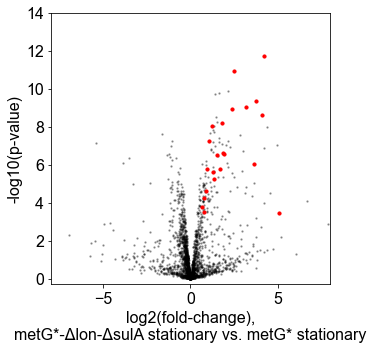

In [5]:
fig,ax = plt.subplots(figsize=(5,5))
x = proteomics_diffexp['X161_O_N_vs_X40_O_N_ratio']
y = -np.log10(proteomics_diffexp['X161_O_N_vs_X40_O_N_p.val'])
ax.scatter(x,y,s=2,color='k',alpha=0.3)

ax.scatter(x[sub_table.index],y[sub_table.index],color='red',s=10)
ax.set_xlim(-8,8)
ax.set_ylim(-0.3,14)
ax.set_xlabel('log2(fold-change),\nmetG*-Δlon-ΔsulA stationary vs. metG* stationary')
ax.set_ylabel('-log10(p-value)')

plt.savefig('figures/figED12a.pdf')

print(len(x))

In [6]:
proteomics_diffexp.loc[y[sub_table.index].sort_values(ascending=False).index[0:5],]


,name,ID,X161_O_N_vs_X35_O_N_p.val,X161_O_N_vs_X40_O_N_p.val,X35_exp_vs_X35_O_N_p.val,X35_O_N_vs_X40_O_N_p.val,X161_O_N_vs_X35_O_N_p.adj,X161_O_N_vs_X40_O_N_p.adj,X35_exp_vs_X35_O_N_p.adj,X35_O_N_vs_X40_O_N_p.adj,X161_O_N_vs_X35_O_N_significant,X161_O_N_vs_X40_O_N_significant,X35_exp_vs_X35_O_N_significant,X35_O_N_vs_X40_O_N_significant,X161_O_N_vs_X35_O_N_ratio,X161_O_N_vs_X40_O_N_ratio,X35_exp_vs_X35_O_N_ratio,X35_O_N_vs_X40_O_N_ratio,uniprot,bnum
bnum,,,,,,,,,,,,,,,,,,,,
b3687,ibpA,P0C054,1.851593e-11,2.052280e-12,1.400050e-03,7.601411e-05,4.750000e-14,2.650000e-14,6.100000e-01,2.890000e-04,True,True,False,True,3.430,4.19,0.532,0.767,P0C054,b3687
b2530,iscS,P0A6B7,3.569716e-05,1.237218e-11,1.505845e-11,2.250811e-10,6.010000e-03,2.650000e-14,7.920000e-08,8.810000e-14,True,True,True,True,0.591,2.51,2.470,1.920,P0A6B7,b2530
b2529,iscU,P0ACD4,1.040560e-07,4.550993e-10,3.407014e-11,5.378094e-06,6.140000e-09,2.650000e-14,8.130000e-07,1.920000e-07,True,True,True,True,2.240,3.75,4.760,1.510,P0ACD4,b2529
b2193,narP,P31802,2.127480e-08,9.942387e-10,1.151791e-03,6.140089e-04,4.570000e-12,2.650000e-14,6.010000e-01,1.150000e-02,True,True,False,True,2.390,3.19,0.736,0.801,P31802,b2193
b0628,lipA,P60716,2.497053e-07,1.264727e-09,4.245980e-12,1.519438e-05,1.350000e-07,2.650000e-14,1.140000e-09,5.480000e-06,True,True,True,True,1.440,2.38,4.040,0.945,P60716,b0628


2182


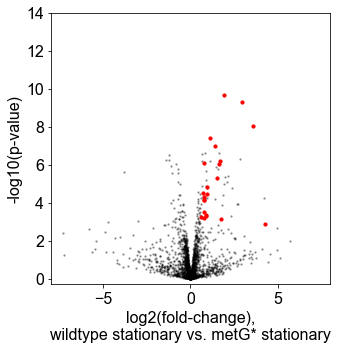

In [7]:
fig,ax = plt.subplots(figsize=(5,5))
x = proteomics_diffexp['X35_O_N_vs_X40_O_N_ratio']
y = -np.log10(proteomics_diffexp['X35_O_N_vs_X40_O_N_p.val'])
ax.scatter(x,y,s=2,color='k',alpha=0.3)
ax.scatter(x[sub_table.index],y[sub_table.index],color='red',s=10)
ax.set_xlim(-8,8)
ax.set_ylim(-0.3,14)

ax.set_xlabel('log2(fold-change),\nwildtype stationary vs. metG* stationary')
ax.set_ylabel('-log10(p-value)')

plt.savefig('figures/figED12b.pdf')
print(len(x))

In [8]:
proteomics_diffexp.loc[y[sub_table.index].sort_values(ascending=False).index[0:5],]


,name,ID,X161_O_N_vs_X35_O_N_p.val,X161_O_N_vs_X40_O_N_p.val,X35_exp_vs_X35_O_N_p.val,X35_O_N_vs_X40_O_N_p.val,X161_O_N_vs_X35_O_N_p.adj,X161_O_N_vs_X40_O_N_p.adj,X35_exp_vs_X35_O_N_p.adj,X35_O_N_vs_X40_O_N_p.adj,X161_O_N_vs_X35_O_N_significant,X161_O_N_vs_X40_O_N_significant,X35_exp_vs_X35_O_N_significant,X35_O_N_vs_X40_O_N_significant,X161_O_N_vs_X35_O_N_ratio,X161_O_N_vs_X40_O_N_ratio,X35_exp_vs_X35_O_N_ratio,X35_O_N_vs_X40_O_N_ratio,uniprot,bnum
bnum,,,,,,,,,,,,,,,,,,,,
b2530,iscS,P0A6B7,3.569716e-05,1.237218e-11,1.505845e-11,2.250811e-10,6.010000e-03,2.650000e-14,7.920000e-08,8.810000e-14,True,True,True,True,0.5910,2.51,2.47,1.92,P0A6B7,b2530
b1805,fadD,P69451,2.378279e-07,2.346092e-06,1.477625e-08,5.085263e-10,1.170000e-07,1.370000e-05,1.090000e-02,8.810000e-14,True,True,True,True,-1.6500,1.31,-2.15,2.96,P69451,b1805
b3041,ribB,P0A7J0,5.267948e-02,2.397861e-09,9.525631e-08,9.872360e-09,6.480000e-01,2.650000e-14,3.990000e-02,8.810000e-14,False,True,True,True,0.5160,4.13,2.91,3.61,P0A7J0,b3041
b1189,dadA,P0A6J5,7.315571e-01,5.583840e-08,2.302392e-09,4.219774e-08,8.650000e-01,2.340000e-11,1.600000e-03,8.810000e-14,False,True,True,True,-0.0295,1.08,-1.46,1.11,P0A6J5,b1189
b4107,phnB,P16681,4.104619e-03,6.690163e-09,3.444762e-11,1.011110e-07,2.850000e-01,2.650000e-14,8.340000e-07,8.810000e-14,False,True,True,True,0.4130,1.81,-2.95,1.39,P16681,b4107


In [9]:
## save for ipage
proteomics_diffexp['X161_O_N_vs_X35_O_N_ratio'].to_csv('source_data/generated/ipage_X161_O_N_vs_X35_O_N.txt',sep='\t')
proteomics_diffexp['X161_O_N_vs_X40_O_N_ratio'].to_csv('source_data/generated/ipage_X161_O_N_vs_X40_O_N.txt',sep='\t')
proteomics_diffexp['X35_O_N_vs_X40_O_N_ratio'].to_csv('source_data/generated/ipage_X35_O_N_vs_X40_O_N.txt',sep='\t')


In [10]:
## read in ipage, discrete 5 bins, p=0.001
combined_pvmatrix = pd.read_csv('source_data/included/figED12_pvmatrix_combined.txt',sep='\t',index_col=0)
## clean up dataframe and make parsable ##
combined_pvmatrix['comparison'] = combined_pvmatrix.index.str.split('.txt_PO_',expand=True).droplevel(1).str.replace('_ratio_for_ipage','')
combined_pvmatrix['type'] = combined_pvmatrix.index.str.split('_PO_',expand=True).droplevel(0).str.split('_P.001_PAGE',expand=True).droplevel(1)
combined_pvmatrix = combined_pvmatrix.reset_index().drop('index',axis=1)
for column in ['1','2','3','4','5']:
    combined_pvmatrix = combined_pvmatrix.merge(combined_pvmatrix[column].str.split('/',expand=True).rename(columns={0:column+'_pval_enriched',1:column+'_pval_depleted'}).astype(float),left_index=True,right_index=True)
combined_pvmatrix = combined_pvmatrix.drop(['1','2','3','4','5'],axis=1)
## resulting combined dataframe gives p-value (from iPAGE) of enrichment or depletion in each gene classification ##
combined_pvmatrix.index = combined_pvmatrix['comparison']
combined_pvmatrix = combined_pvmatrix.drop('comparison',axis=1)

## find pathways enriched in both comparisons vs metG ("X40")
threshold = np.log10(0.005)
combined_pvmatrix.loc[combined_pvmatrix.index.str.contains('X40') & ((combined_pvmatrix['5_pval_enriched']<threshold))].groupby('0')['5_pval_enriched'].count().sort_values(ascending=False)


0
GO:0051536 iron-sulfur cluster binding         2
H-NS_Down H-NS_Down                            1
GO:0051539 4 iron, 4 sulfur cluster binding    1
Name: 5_pval_enriched, dtype: int64

In [11]:
## find pathways depleted in lon deletion vs both wildtype and metG

combined_pvmatrix.loc[combined_pvmatrix.index.str.contains('X161') & ((combined_pvmatrix['1_pval_enriched']<threshold))].groupby('0')['1_pval_enriched'].count().sort_values(ascending=False)


0
GO:0030288 outer membrane-bounded periplasmic space    2
GO:0015198 oligopeptide transporter activity           2
GO:0006857 oligopeptide transport                      2
GO:0006099 tricarboxylic acid cycle                    2
Fur_Up Fur_Up                                          2
NtrC_Up NtrC_Up                                        1
AropD ArcAB operon Downregulated                       1
Name: 1_pval_enriched, dtype: int64

In [12]:
## find pathways enriched in lon deletion vs both wildtype and metG

combined_pvmatrix.loc[combined_pvmatrix.index.str.contains('X161') & ((combined_pvmatrix['5_pval_enriched']<threshold))].groupby('0')['1_pval_enriched'].count().sort_values(ascending=False)


0
GO:0051536 iron-sulfur cluster binding      2
H-NS_Down H-NS_Down                         1
AcStReU Acid Stress Response Upregulated    1
Name: 1_pval_enriched, dtype: int64

20
2182
2182


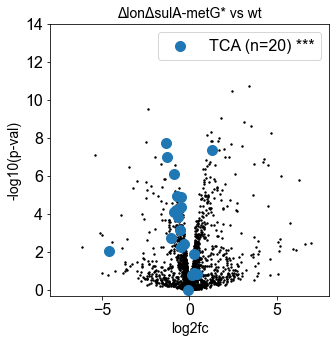

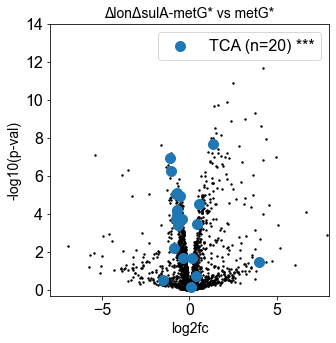

In [13]:
comparisons = ['X161_O_N_vs_X35_O_N','X161_O_N_vs_X40_O_N']
names = [u'ΔlonΔsulA-metG* vs wt',u'ΔlonΔsulA-metG* vs metG*']

bnums = 'b2210   b0724   b0723   b0722   b0727   b0720   b2976   b0729   b0728   b4015   b0118   b4014   b1136'.split(' ')
bnums = bnums + 'b3236   b4122   b1276   b3956   b1612   b4153   b1611'.split(' ')
bnums = pd.Series(bnums)
bnums = bnums[bnums.str.contains('b')].reset_index().drop('index',axis=1)
print(len(bnums))
## GO:0006099 tricarboxylic acid cycle
for comparison,name in zip(comparisons,names):
    x = proteomics_diffexp[comparison + '_ratio']
    y = -np.log10(proteomics_diffexp[comparison + '_p.val'])
    fig,ax = plt.subplots(figsize=(5,5))
    ax.scatter(x,y,s=2,color='k')
    ax.scatter(x[bnums[0]],y[bnums[0]],label='TCA (n=20) ***')
    ax.set_xlabel('log2fc',size=14)
    ax.set_ylabel('-log10(p-val)',size=14)
    ax.set_title(name,size=14)
    ax.legend()
    ax.set_xlim(-8,8)
    ax.set_ylim(-0.3,14)
    #bnum = 'b1276'
    #ax.scatter(x[bnum],y[bnum],s=100,color='orange')
    if 'X40' in comparison:
        plt.savefig('figures/figED12c.pdf')
    else:
        plt.savefig('figures/figED12d.pdf')
    print(len(x))


In [14]:
table.columns = table.columns.str.replace('X161','metG*ΔlonΔsulA').str.replace('X35','wt').str.replace('X40','metG*').str.replace('O_N','ON')
table = table.drop(['ID','uniprot'],axis=1)
table.to_csv('tables/TableS4.txt',sep='\t')


54
2182
2182


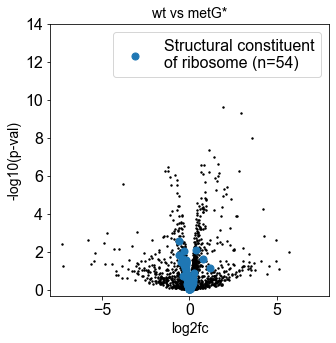

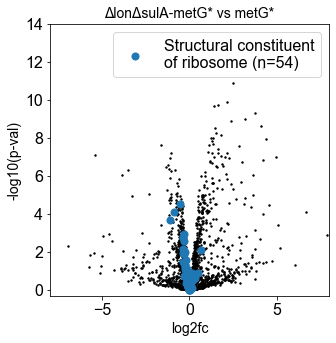

In [15]:
comparisons = ['X35_O_N_vs_X40_O_N','X161_O_N_vs_X40_O_N']
names = ['wt vs metG*',u'ΔlonΔsulA-metG* vs metG*']

bnums = 'b3321   b3637   b1716   b3065   b0023   b2609   b2606   b3320   b3936   b3983   b3984   b3985   b3986   b3703   b0169   b4203   b4202   b4200   b3165   b3294   b3296   b3297   b0911   b3230   b3231   b3186   b3298   b3303   b3342   b3341   b3304   b3305   b3306   b3316   b3308   b3315   b3309   b3310   b3314   b3311   b3312   b3317   b3313   b3301   b3319   b2185   b3302'.split('   ')
bnums = bnums + 'b1480   b1089   b1717   b0296   b3636   b4506   b3185   b3299   b3307   b3318'.split('   ')
bnums = proteomics_diffexp.reindex(labels=bnums).sort_values('name').dropna().index
print(len(bnums))
## GO:0003735 structural constituent of ribosome
for comparison,name in zip(comparisons,names):
    x = proteomics_diffexp[comparison + '_ratio']
    y = -np.log10(proteomics_diffexp[comparison + '_p.val'])
    fig,ax = plt.subplots(figsize=(5,5))
    ax.scatter(x,y,s=2,color='k')
    ax.scatter(x[bnums],y[bnums],s=50,label='Structural constituent\nof ribosome (n=54)')
    ax.set_xlabel('log2fc',size=14)
    ax.set_ylabel('-log10(p-val)',size=14)
    ax.set_title(name,size=14)
    ax.legend()
    ax.set_xlim(-8,8)
    ax.set_ylim(-0.3,14)
    if 'X161' in comparison:
        plt.savefig('figures/figED12e.pdf')
    else:
        plt.savefig('figures/figED12f.pdf')
    print(len(x))


In [16]:
combined_pvmatrix.loc[combined_pvmatrix['0'].str.contains('structural constituent of ribosome')]

,0,type,1_pval_enriched,1_pval_depleted,2_pval_enriched,2_pval_depleted,3_pval_enriched,3_pval_depleted,4_pval_enriched,4_pval_depleted,5_pval_enriched,5_pval_depleted
comparison,,,,,,,,,,,,
figS19_ipage_X161_O_N_vs_X40_O_N,GO:0003735 structural constituent of ribosome,go,-0.004,-1.576,-2.613,-0.0,-1.862,-0.003,-0.178,-0.326,-0.0,-4.139
figS19_ipage_X161_O_N_vs_X35_O_N,GO:0003735 structural constituent of ribosome,go,-0.000,-3.271,-3.038,-0.0,-2.613,-0.000,-0.106,-0.473,-0.0,-3.271
